ECE 424/523: Chemical Reaction Networks
===

Prof. Eric Klavins

&copy; 2019, University of Washington

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

# Uncomment in below Google colab to render sympy equations nicely
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#     javascript(url=url)
#     return printing.latex(exp,**options)
# init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Reactions
===

A reaction has the form

$$
\underbrace{n_1 X_1 + ... + n_N X_N}_\mathrm{reactants}
  \rightharpoonup \underbrace{m_1 X_1 + ... + m_N X_N}_\mathrm{products} 
$$

where the $X_i$ are chemical species names. In this reaction $n_i$ molecules of species $X_i$ are consumed, and $m_i$ are produced. The $n_i$ and $m_i$ have to be non-negative integers, and may be zero.

A reaction can be
written more conveniently as a vector

$$
a = -
\begin{pmatrix}
n_1 \\
\vdots \\
n_N
\end{pmatrix} + 
\begin{pmatrix}
m_1 \\
\vdots \\
m_N
\end{pmatrix} = -a_R + a_P \in \mathbb{N}^N, 
$$

where $a_R$ is the vector of reactant numbers and $a_P$ is the vector
of product numbers. The vector $a$ is called the *stoichiometry* of the reaction.

Example
---

Suppose we have three species $X$, $Y$ and $Z$. The single reaction 

$$
X + Y \rightharpoonup Z
$$

can be written as a vector

$$
a = \begin{pmatrix}
-1 \\ -1 \\ 1
\end{pmatrix}
$$

as long as we remember that the species are always ordered as we
presented them above.

A system inside the cell, consisting of a number of species and the
reactions among them is modeled a *reaction network*, which is
simply a set of reactions. The nodes of the network are *
  complexes* (e.g. $X+Y$ and $Z$ in the previous example) and the
edges are the reaction arrows. Furthermore, the reaction vectors
associated with the reactions in a network can be grouped into a
matrix $A$ called the *stiochiometric matrix*.

Example
---

The reactions 
\begin{eqnarray}
X + Y & \rightharpoonup & Z \\
2Z & \rightharpoonup & X
\end{eqnarray}

form a reaction network with stiochiometric matrix

$$
A = \left ( \begin{array}{cc}
-1 & 1 \\
-1 & 0 \\
1 & -2
\end{array} \right ).
$$



Kinetics
===

In a system of reacting chemicals, the state at a particular time is
described by the *concentrations* of each species, usually
arranged into another vector. If $X_i$ is a species, then we write
$v_{X_i}(t)$ or just $v_i(t)$ to represent the number of molecules of
species $X_i$ per unit volume at time $t$. Then we group the
concentrations into a vector

$$
v = \begin{pmatrix}
v_1 \\
\vdots \\
v_n
\end{pmatrix} \in \mathbb{P}^N.
$$

Associated with each reaction $a$ is a *reaction rate*, which is a function that takes $N$ non-negative real numbers to a non-negative real number. It is the *rate$ of the reaction $a$.

$$
K_a : \mathbb{P}^N \rightarrow \mathbb{P}
$$

that depends on the concentrations. If $K_a(v) > 0$ then every
reactant in $a$ has nonzero concentration in the state $v$. Reaction
rates, when noted, are usually written above the reaction arrows in a
specification of the reaction. A *kinetics* for a network is such
an assignment of a rate to each reaction $a$. These rates may be
grouped into a vector $K(v)$ that depends on $v$:

$$
K(v) = \begin{pmatrix}
K_{a_1}(v) \\
\vdots \\
K_{a_M}(v)
\end{pmatrix},
$$

where we have numbered the reactions from $1$ to $M$.

The usual assumption is that the kinetics obey the **law of mass
  action**, although they need not. In later chapters we will allow
the rates to be defined in other ways. For now, however, we stick with
the following definition of the rates. 


**Definition**: Suppose that $a$ is defined as above. Then the
*mass action rate* for the reaction $a$ is defined by

$$
K_a(v) \triangleq k_a \prod_{i}v_i^{n_i}
$$

where $k_a > 0$ is called the rate constant for the reaction
$a$. Note that the exponent depends on the number of $X_i$ consumed by the reaction, but not produced. 

The idea the following. Suppose that an $X$ molecule reacts with
a $Y$ molecule according to the reaction

$$
X + Y \xrightarrow[\text{}]{\text{$k$}} Z
$$

If there are $v_X$ molecules of type $X$ per liter and $v_Y$ molecules
of type $Y$ per liter, then the number of possible reactions that can
occur per liter is $v_X v_Y$. Since some types of reactions may be
stronger or faster than others, we add a rate constant $k$ to our
model to obtain $kv_Xv_Y$. When the rate constant is important, we
make a note of it by writing it, as above, near the arrow used to
specify the reaction.  The definition is a
generalization of the idea of having the rate of a reaction include a
term that describes the number of ways that a reaction can happen: the
rate is proportional to the current concentrations, or masses, of the
reactants.

Example
---

The reaction rates for the reactions in the network above are

$$
K(v) = \begin{pmatrix}
k_1 v_X v_Y \\
k_2 v_Z^2
\end{pmatrix}
$$

where we suppose that $k_1$ and $k_2$ are the rate constants for the two reactions in the network respectively.

The Deterministic Equation
---

The rate at which the concentrations in a reaction network change
leads to a set of differential equations, called the deterministic
equations (to contrast them with the stochastic equations we study
later) that can be written succinctly as

$$
\dot v = A K(v).
$$

Along with an initial concentration vector $v(0)$ and actual values
for the rate constants, this completely specifies the behavior of a
reaction network.

Example
---
Once again, consider the example above with

$$
A = \left ( \begin{array}{cc}
-1 & 1 \\
-1 & 0 \\
1 & -2
\end{array} \right ).
$$

and

$$
K(v) = \begin{pmatrix}
k_1 v_X v_Y \\
k_2 v_Z^2
\end{pmatrix}
$$

then
$$
\dot v = \begin{pmatrix}
\dot v_X \\
\dot v_Y \\
\dot v_Z
\end{pmatrix} = \begin{pmatrix}
-k_1 v_X v_Y + k_2 v_Z^2 \\
-k_1 v_X v_Y \\
k_1 v_X v_Y - 2 k_2 v_Z
\end{pmatrix} .
$$

We can simulate this system in Python as follows

In [61]:
var("t k1 k2 vx vy vz")
A = Matrix([
    [-1,1],
    [-1,0],
    [1,-2]
])
K = Matrix([
    [ k1 * vx * vy ],
    [ k2 * vz**2 ]
])
A*K

⎡                 2 ⎤
⎢-k₁⋅vx⋅vy + k₂⋅vz  ⎥
⎢                   ⎥
⎢     -k₁⋅vx⋅vy     ⎥
⎢                   ⎥
⎢                  2⎥
⎣k₁⋅vx⋅vy - 2⋅k₂⋅vz ⎦

In [78]:
faux = lambdify([[vx,vy,vz]],(A*K).subs(k1,1).subs(k2,2),'numpy')
def f(x,t):
    return faux(x).flatten()
t = np.linspace(0,8,100)
x = spi.odeint(f,[1,1,0],t);

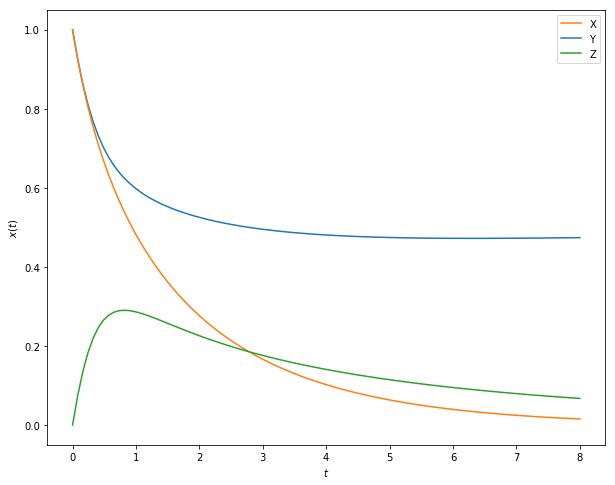

In [80]:
plt.rcParams['figure.figsize'] = [4,3]
plt.rcParams['figure.figsize'] = [10,8]
X,Y,Z = plt.plot(t,x);
plt.xlabel('$t$');
plt.ylabel('$x(t)$');
plt.legend([Y,X,Z],["X","Y","Z"]);

Generic Code
===

The code above only works for the particular example. We can generalize the code to come up with the equations for any chemical reaction network.

In [366]:
def StoichiometricMatix(rxns):
    """Returns the stoichiometric matrix for the given reactions.
       It is assumed that the reactions are in a list of reactions
       each ofthe form
          [ar, ap, rate_constant]
       where ar is the reactant vector and ap is the product vector.
    """
    vectors = [(-Matrix(a[0]) + Matrix(a[1])) for a in rxns]
    A = Matrix(vectors[0])
    for i in range(1,len(vectors)):
        A = A.col_insert(i,vectors[i])
    return A

def MAK(a,syms):
    """The mass action kinetics rate for the reaction a [ ar, ap, k ].
       syms should be a list of sympy symbols such as returned by var("x y z")"""
    rate = a[2] # k
    for r,s in zip(a[0],syms):
        rate = rate * s**r
    return rate

def KineticsVector(rxns,syms):
    """Builds the kinetics vector for the given reactions"""
    return Matrix([MAK(a,syms) for a in rxns])

def Dynamics(rxns,syms):
    """Builds the right hand side of the equation dv/dt = AK(v)"""
    return StoichiometricMatix(rxns) * KineticsVector(rxns,syms)

def ODEs(dynamics,syms):
    """Convertns the dynamics into a function that can be used with scipy's odeint function"""
    faux = lambdify([syms],dynamics,'numpy')
    def f(x,t):
        return faux(x).flatten()
    return f

def pick(species,names):
    a = [0 for s in species]
    for name in names:
        a[species.index(name)] += 1
    return a

def make_picker(species):
    def f(*args):
        return pick(species, args)
    return f

In [367]:
syms = var("x y z")
var("k1 k2")
rxns = [
    [[1,1,0],[0,0,1],k1], # X+Y -k1-> Z
    [[0,0,2],[1,0,0],k2]  # 2Z -k2-> X
]
StoichiometricMatix(rxns)

⎡-1  1 ⎤
⎢      ⎥
⎢-1  0 ⎥
⎢      ⎥
⎣1   -2⎦

In [368]:
KineticsVector(rxns,syms)

⎡k₁⋅x⋅y⎤
⎢      ⎥
⎢    2 ⎥
⎣k₂⋅z  ⎦

In [203]:
dyn = Dynamics(rxns,syms)
dyn

⎡              2 ⎤
⎢-k₁⋅x⋅y + k₂⋅z  ⎥
⎢                ⎥
⎢    -k₁⋅x⋅y     ⎥
⎢                ⎥
⎢               2⎥
⎣k₁⋅x⋅y - 2⋅k₂⋅z ⎦

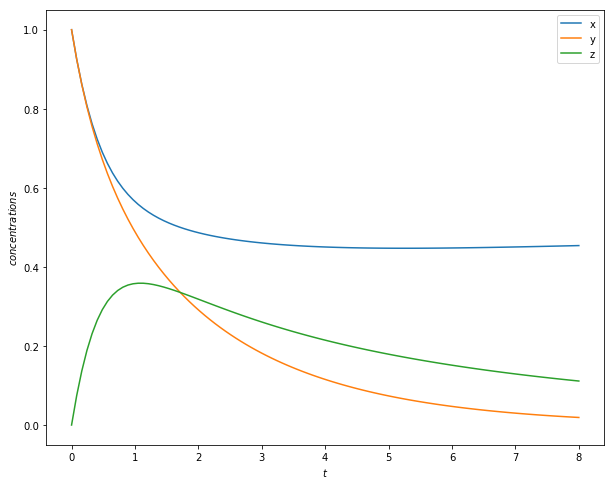

In [197]:
f = ODEs(dyn.subs(k1,1).subs(k2,1),syms)
t = np.linspace(0,8,100)
x = spi.odeint(f,[1,1,0],t);
plots = plt.plot(t,x);
plt.xlabel('$t$');
plt.ylabel('$concentrations$');
plt.legend(plots,syms);

Cooperativity
===

In [373]:
species = var("R R2 Gon Goff P")
params = var("u k1 k2 k3 k4 k5 k6")
v =  make_picker(species)
nothing = [0 for s in species]

rxns = [
    
    [nothing, v(R), u],        # 0 -> R
    [v(R), nothing, k1],       # R -> 0
    [v(R,R), v(R2), k2],       # R + R -> R2
    [v(R2), v(R,R), k3],       # R2 -> R + R
    [v(Gon,R2), v(Goff), k4],  # Gon + R2 -> Goff
    [v(Goff), v(Gon,R2),k5],   # Goff -> Gon + R2
    [v(Gon), v(Gon,P),k6],     # Gon -> Gon + P
    [v(P), nothing, k1]        # P -> nothing
    
]

StoichiometricMatix(rxns)

⎡1  -1  -2  2   0   0   0  0 ⎤
⎢                            ⎥
⎢0  0   1   -1  -1  1   0  0 ⎥
⎢                            ⎥
⎢0  0   0   0   -1  1   0  0 ⎥
⎢                            ⎥
⎢0  0   0   0   1   -1  0  0 ⎥
⎢                            ⎥
⎣0  0   0   0   0   0   1  -1⎦

In [375]:
dyn = Dynamics(rxns,species)
dyn

⎡       2                           ⎤
⎢  - 2⋅R ⋅k₂ - R⋅k₁ + 2⋅R₂⋅k₃ + u   ⎥
⎢                                   ⎥
⎢                       2           ⎥
⎢Goff⋅k₅ - Gon⋅R₂⋅k₄ + R ⋅k₂ - R₂⋅k₃⎥
⎢                                   ⎥
⎢        Goff⋅k₅ - Gon⋅R₂⋅k₄        ⎥
⎢                                   ⎥
⎢       -Goff⋅k₅ + Gon⋅R₂⋅k₄        ⎥
⎢                                   ⎥
⎣           Gon⋅k₆ - P⋅k₁           ⎦

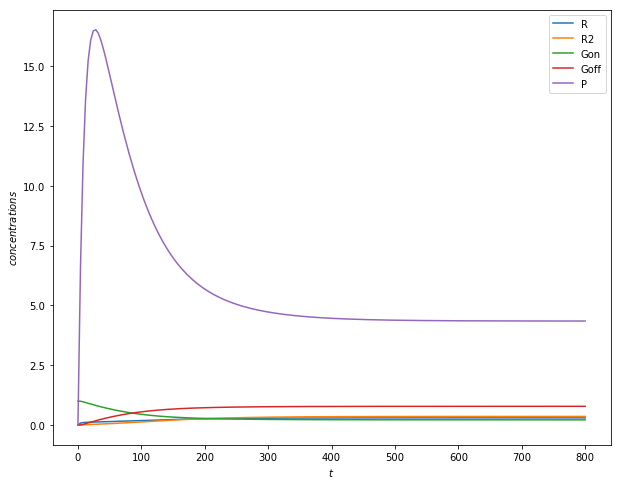

In [398]:
param_values = [
    (k1,0.1),         # protein dilution and degradation
    (k2,1), (k3,0.25), # dimerization
    (k4,1), (k5,0.1), # repressor binding
    (k6,2)            # gene expression
]
f = ODEs(dyn.subs(param_values).subs(u,0.03),species)
t = np.linspace(0,800,200)
x0 = [0 for s in species]
x0[2] = 1 # Initial population of Gon
x = spi.odeint(f,x0,t);
plots = plt.plot(t,x);
plt.xlabel('$t$');
plt.ylabel('$concentrations$');
plt.legend(plots,species);

In [400]:
solve(dyn,species)

⎡⎧                                  ⎛           __________________________⎞   
⎢⎪                                  ⎜          ╱                     2  2 ⎟   
⎢⎪                                  ⎜         ╱    2            16⋅k₂ ⋅u  ⎟   
⎢⎪                                 -⎜k₁ -    ╱   k₁  + 8⋅k₂⋅u + ───────── ⎟   
⎢⎨                2                 ⎜       ╱                        2    ⎟   
⎢⎪       P⋅k₂⋅k₄⋅u        P⋅k₁      ⎝     ╲╱                       k₁     ⎠   
⎢⎪Goff: ───────────, Gon: ────, R: ─────────────────────────────────────────, 
⎢⎪      k₁⋅k₃⋅k₅⋅k₆        k₆                         4⋅k₂                    
⎣⎩                                                                            

          ⎫⎤
          ⎪⎥
          ⎪⎥
          ⎪⎥
        2 ⎬⎥
    k₂⋅u  ⎪⎥
R₂: ──────⎪⎥
      2   ⎪⎥
    k₁ ⋅k₃⎭⎦

In [427]:
var("gtot")
goff, p, r, r2 = solve(dyn.subs(Gon,gtot - Goff),[Goff, P, R, R2])[0]
goff, p, r, r2

⎛               2                                    2 ⎞
⎜   gtot⋅k₂⋅k₄⋅u         gtot⋅k₁⋅k₃⋅k₅⋅k₆    u   k₂⋅u  ⎟
⎜────────────────────, ────────────────────, ──, ──────⎟
⎜  2                2    2                2  k₁    2   ⎟
⎝k₁ ⋅k₃⋅k₅ + k₂⋅k₄⋅u   k₁ ⋅k₃⋅k₅ + k₂⋅k₄⋅u       k₁ ⋅k₃⎠

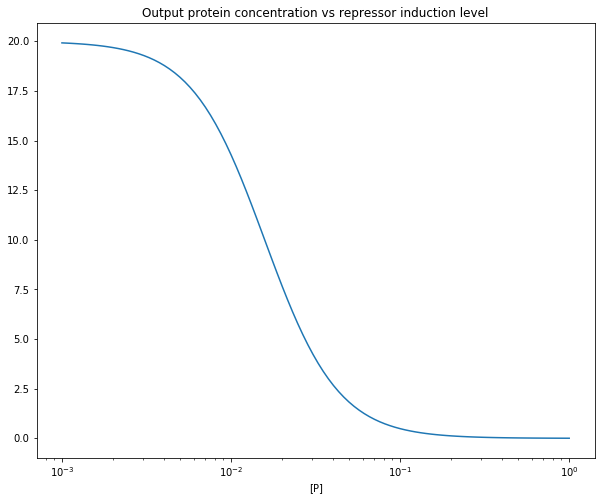

In [424]:
f = lambdify(u,p.subs(param_values).subs(gtot,1), 'numpy')
w = np.linspace(-3,0,100)
uvals = 10**w
plt.plot(uvals,f(uvals))
plt.xlabel("u")
plt.xlabel("[P]")
plt.title("Output protein concentration vs repressor induction level")
plt.xscale('log')

Example: Repressilator Version 1
===

Here we will represent the repressilator from [Elowitz 2000](https://www.nature.com/articles/35002125).

The species will be listed in the stochiometry vectors in the following order:
- P1
- P2
- P3
- G1 
- G2
- G3
- P1G2
- P2G3
- P3G1

In [257]:
pick(species,[P1, G2])

[1, 0, 0, 0, 1, 0, 0, 0, 0]

In [350]:
species = var("P1 P2 P3 G1 G2 G3 PG12 PG23 PG31")
a =  make_picker(species)
nothing = [0 for s in species]
rate_syms = var("k1 k2 k3 k4")

repressilator = [
    
    [a(G1), a(G1,P1), k1],    # G1 -> P1
    [a(P1), nothing, k2],     # P1 -> 0
    [a(P1,G2), a(PG12), k3],  # P1 + G2 -> P1G2
    [a(PG12), a(P1,G1), k4],  # P1G2 -> P1 + G2
    
    [a(G2), a(G2,P2), k1],     
    [a(P2), nothing, k2],     
    [a(P2,G3), a(PG23), k3], 
    [a(PG23), a(P2,G3), k4],   
    
    [a(G3), a(G3,P3), k1],     
    [a(P3), nothing, k2],    
    [a2(P3,G1), a(PG31), k3],
    [a(PG31), a2(P3,G1), k4]
    
]
StoichiometricMatix(repressilator)

⎡1  -1  -1  1   0  0   0   0   0  0   0   0 ⎤
⎢                                           ⎥
⎢0  0   0   0   1  -1  -1  1   0  0   0   0 ⎥
⎢                                           ⎥
⎢0  0   0   0   0  0   0   0   1  -1  -1  1 ⎥
⎢                                           ⎥
⎢0  0   0   1   0  0   0   0   0  0   -1  1 ⎥
⎢                                           ⎥
⎢0  0   -1  0   0  0   0   0   0  0   0   0 ⎥
⎢                                           ⎥
⎢0  0   0   0   0  0   -1  1   0  0   0   0 ⎥
⎢                                           ⎥
⎢0  0   1   -1  0  0   0   0   0  0   0   0 ⎥
⎢                                           ⎥
⎢0  0   0   0   0  0   1   -1  0  0   0   0 ⎥
⎢                                           ⎥
⎣0  0   0   0   0  0   0   0   0  0   1   -1⎦

In [348]:
dyn = Dynamics(repressilator,species)
dyn

⎡G₁⋅k₁ - G₂⋅P₁⋅k₃ - P₁⋅k₂ + PG₁₂⋅k₄ ⎤
⎢                                   ⎥
⎢G₂⋅k₁ - G₃⋅P₂⋅k₃ - P₂⋅k₂ + PG₂₃⋅k₄ ⎥
⎢                                   ⎥
⎢-G₁⋅P₃⋅k₃ + G₃⋅k₁ - P₃⋅k₂ + PG₃₁⋅k₄⎥
⎢                                   ⎥
⎢   -G₁⋅P₃⋅k₃ + PG₁₂⋅k₄ + PG₃₁⋅k₄   ⎥
⎢                                   ⎥
⎢             -G₂⋅P₁⋅k₃             ⎥
⎢                                   ⎥
⎢        -G₃⋅P₂⋅k₃ + PG₂₃⋅k₄        ⎥
⎢                                   ⎥
⎢        G₂⋅P₁⋅k₃ - PG₁₂⋅k₄         ⎥
⎢                                   ⎥
⎢        G₃⋅P₂⋅k₃ - PG₂₃⋅k₄         ⎥
⎢                                   ⎥
⎣        G₁⋅P₃⋅k₃ - PG₃₁⋅k₄         ⎦

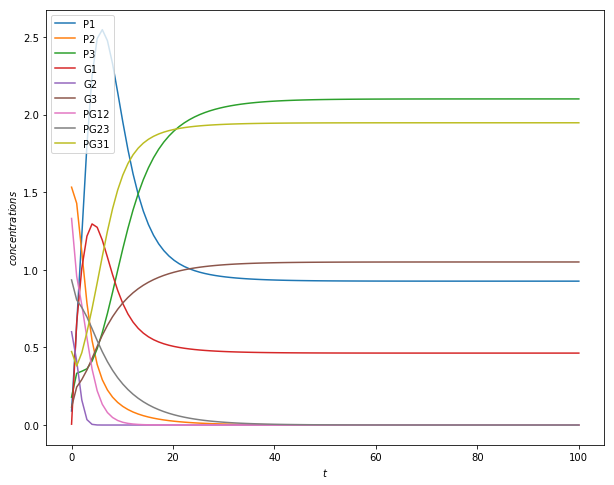

In [365]:
f = ODEs(dyn.subs(k1,1).subs(k2,.5).subs(k3,1).subs(k4,.5),species)
t = np.linspace(0,100,100)
x0 = [np.random.rand()*2 for s in species]
x = spi.odeint(f,x0,t);
plots = plt.plot(t,x);
plt.xlabel('$t$');
plt.ylabel('$concentrations$');
plt.legend(plots,species);